# Teor칤a de los Circuitos 2   <img src="./logo_UTN.svg" align="right" width="150" /> 

Mariano Llamedo Soria. Profesor Titular de TC2. UTN-BA.


# Primeros pasos

### Preparaci칩n del entorno de trabajo


Se sugiere tener listo durante la primer semana el ambiente de trabajo:

* [Python](https://www.python.org/)
* La librer칤a de la materia [PyTC2](https://github.com/marianux/pytc2)
* El ambiente de desarrollo cient칤fico/t칠cnico [Spyder](https://www.spyder-ide.org/)
* El editor de documentos t칠cnicos [Jupyter Notebook](https://jupyter.org/install)
* El simulador circuital m치s utilizado en la industria [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html). Funciona muy bien con [Wine](https://ltwiki.org/LTspiceHelpXVII/LTspiceHelp/html/Running_Under_Linux.htm).
* El gestor de repositorios [Git](https://git-scm.com/downloads)
* Una [cuenta en Github](https://github.com/), donde crear치s una carpeta/repositorio a trav칠s del cual presentar치s tus trabajos.

Siguiendo los siguientes pasos podr치s tener todo listo:

#### Paso 1: Instalaci칩n de Python

1. Instalamos Python, **asegurando que tengas una versi칩n 3.8 o superior**, y el gestor de paquetes PIP

```bash
$ sudo apt install python3 python3-pip
$ python3 -V
Python 3.10.4
```


2. Ahora ya podemos usar el gestor PIP. Instalar치 en tu entorno de usuario todos los m칩dulos e IDE necesaria para que trabajes en PDS. Antes se pod칤a hacer paquete a paquete, pero ahora est치 todo englobado en la librer칤a PyTC2.

```bash
$ pip3 install --user --upgrade pip pytc2
```
3. Si todo termina bien, ya ten칠s casi todo el ambiente de trabajo. Cuando quieras actualizar cualquier paquete, por lo general el Spyder IDE es un proyecto muy activo que saca varias actualizaciones por mes, deber칤as ejecutar:

```bash
$ pip3 install --user --upgrade spyder # ... y todos los dem치s paquetes que quieras actualizar
```


#### Paso 2: Instalaci칩n de GIT y repositorios

1. Instalamos GIT

```bash
$ sudo apt install git
```

2. Ahora ya podemos clonar los repositorios de la materia:

```bash
$ cd tu_directorio_de_trabajo
$ git clone https://github.com/marianux/tc2.git
```

3. Ahora si ya pod칠s revisar los siguientes scripts para familiarizarte con Python:

    a. Abr칤 Spyder. Si usaste Matlab, ver치s que es un clon. Situ치 tu directorio de trabajo en *tu_directorio_de_trabajo*.
     
    b. Abr칤 los siguientes scripts de ejemplo y prob치 ejecutarlos:
     
        * demo_seg_orden1.py
        * demo_seg_orden2.py
    
    c. Ejecutalos (Run - F5). Si sos usuario de Matlab, [este documento](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) te va a servir seguramente.
    
    d. Obtendr치s como resultado unas figuras con la respuesta en frecuencia de un sistema de este tipo:

\begin{equation}
H(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

con par치metros $\omega_0=1$ rad/s y $Q=1$

![modyfase.png](modyfase.png)

Esto que ves arriba, es una imagen PNG incrustada en el notebook. Como esto es un notebook no es la idea incrustar im치genes como lo pod칠s hacer en cualquier editor de documentos, sino que aprovechamos una de las principales ventajas que tiene y ejecutamos el mismo c칩digo aqu칤 dentro, transcribiendo el contenido de *demo_seg_orden1.py*:


(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

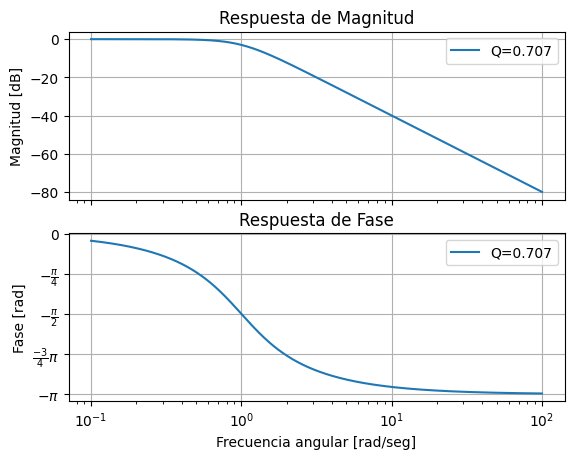

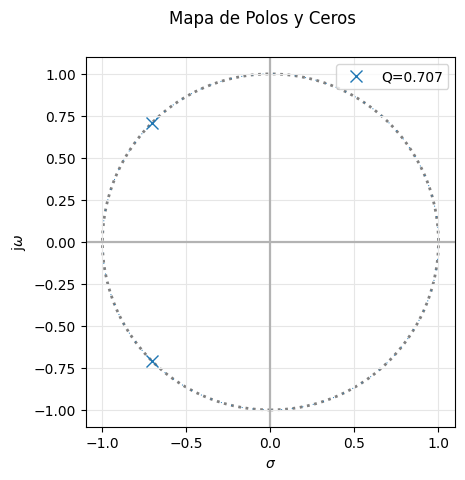

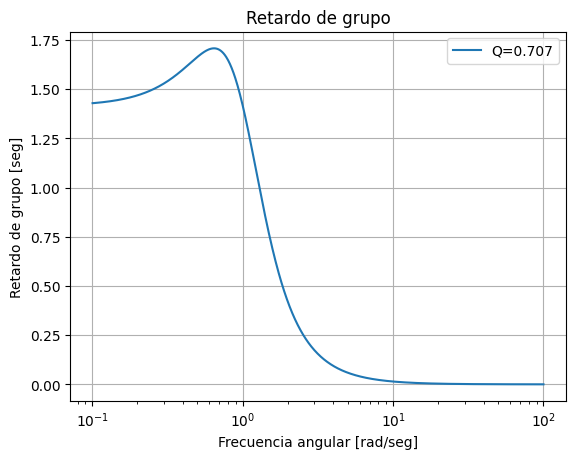

In [1]:
# Librer칤as externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librer칤a de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 1
qq = np.sqrt(2)/2

my_tf = TransferFunction( [w0**2], [1, w0/qq, w0**2] )

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))


Como se puede ver, los tama침os por defecto son **demasiado peque침os**, deber칤as ampliarlos un poco para que se vean m치s adecuados al navegador. Te comparto una receta, y de paso, pod칠s jugar con los par치metros y probar el segundo ejemplo sin demasiado esfuerzo:

In [2]:
# Esta parte de c칩digo la agregamos SOLO en los notebooks para fijar el estilo de los gr치ficos.
#
# Setup inline graphics: Esto lo hacemos para que el tama침o de la salida, 
# sea un poco m치s adecuada al tama침o del jupyter notebook documento

# alg칰n bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicializaci칩n de librer칤as


Una vez que hayas corrido la celda de arriba, pod칠s correr la de abajo y ver c칩mo cambia el tama침o de los gr치ficos de salida

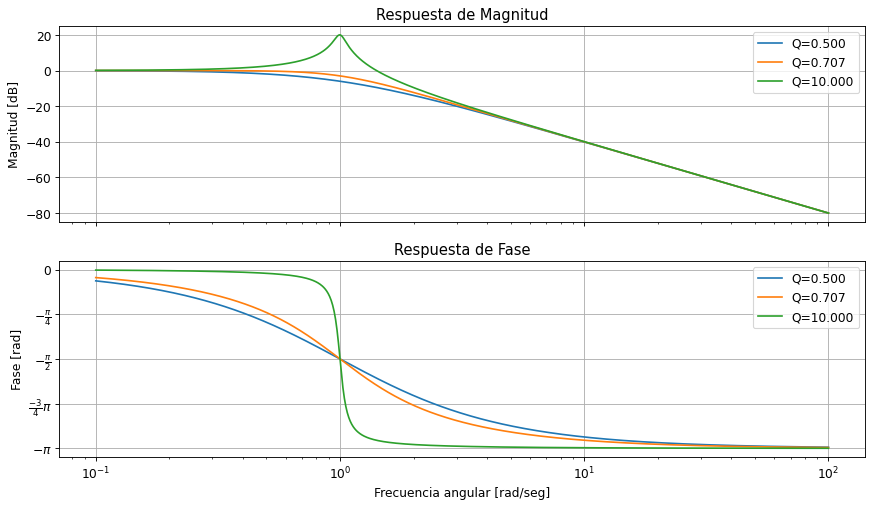

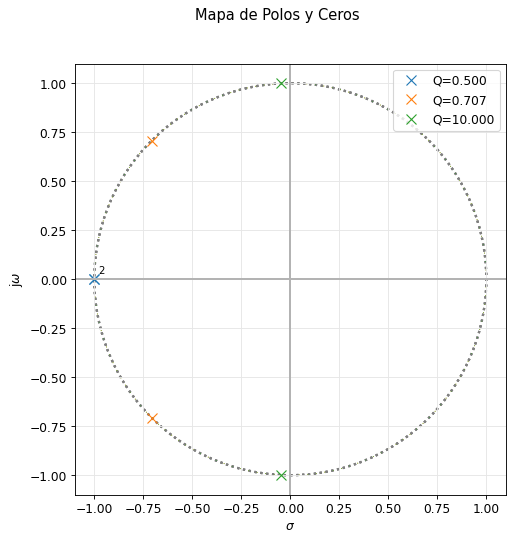

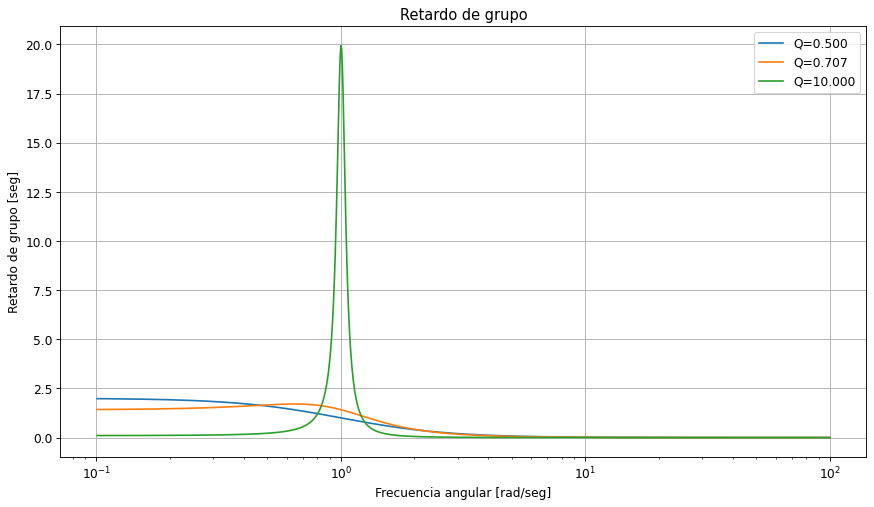

In [3]:


qq_param = [ 0.5, np.sqrt(2)/2, 10]

for qq in range(len(qq_param)):
    
    my_tf = TransferFunction( [w0**2], [1, w0/qq_param[qq], w0**2] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq_param[qq]) )
    
    pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq_param[qq])) #S plane pole/zero plot
    
    GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq_param[qq]))



Arriba de este texto deber칤as ver los mismos gr치ficos ajustados al ancho de la columna. Se deber칤an leer un poco m치s claro. Debajo te dejo una intro a Python que si bien **no es estrictamente necesaria que la veas**, tal vez te interese.

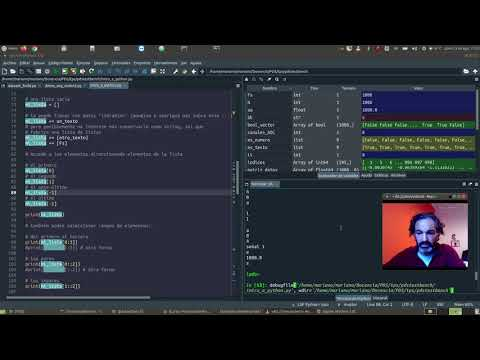

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('CJAZCYvigVc', width=800, height=450, list='PLlD2eDv5CIe9l0cjBJ1USQnC3gvV3n_Ga', index=1)


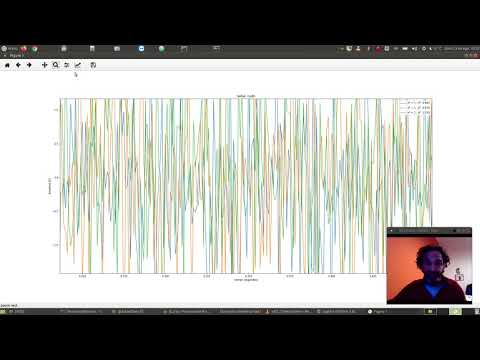

In [5]:
YouTubeVideo('yQ3KuMepMTM', width=800, height=450, list='PLlD2eDv5CIe9l0cjBJ1USQnC3gvV3n_Ga', index=2)


#### Paso 4: Jupyter Notebooks 
Este documento que est치s leyendo fue creado con Jupyter Notebooks. B치sicamente es un editor de texto que incorpora la *gran* ventaja de tener disponible en un mismo entorno de trabajo:

* Editor de texto con formato *Markdown*
* Posibilidad de incorporar lenguaje matem치tico via $ \LaTeX $
* Posibilidad de incluir c칩digo y (*re*) generaci칩n autom치tica de gr치ficas y tablas.
* Posibilidad de insertar audios, videos de Youtube y otros contenidos multimedia.
* Visualizaci칩n desde *CUALQUIER* dispositivo de forma f치cil y elegante.

Seguramente en cuanto los comiences a usar, **no podr치s volver a usar otro formato para art칤culos t칠cnicos**. En el siguiente video podr치s ver un tutorial para dar los primeros pasos:
   


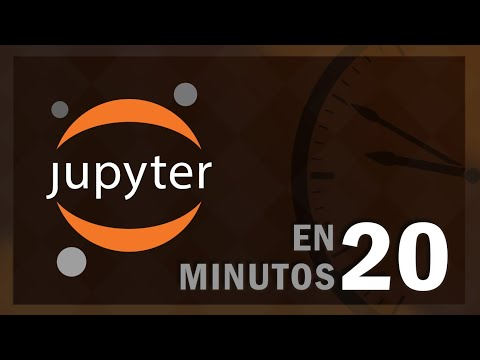

In [6]:
# en Castellano
YouTubeVideo('6Vr9ZUntCyE', width=800, height=450)


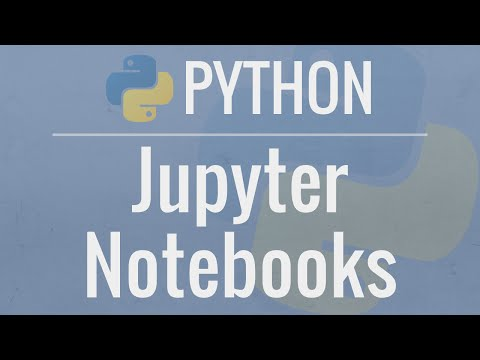

In [7]:
# o Ingl칠s
YouTubeVideo('HW29067qVWk', width=800, height=450)


#### Paso 4: Ahora ustedes ... 
Tendr치n que hacer su propio *Hola mundo* versi칩n TC2.

1. Hacer una copia o duplic치 en *tu_carpeta_de_trabajo*, alguno de los notebooks de ejemplo:

    * [notebook0](notebook0.ipynb) 
    
    * [tu primer jupyter notebook](tu_primer_notebook.ipynb)
    
    
2. Edit치 el notebook a tu antojo, pod칠s practicar quitar, agregar o modificar celdas, etc. Una vez que te sientas confiado:

    a. Modific치 la celda de t칤tulo y **coloc치 tu nombre y apellido**.
    
    b. Duplic치 la celda de c칩digo donde se analiza el sistema con $\omega_0 = 1$ y $Q=\frac{\sqrt{2}}{2}$, y cambialo por otro con par치metros diferentes.
    
    c. Agreg치 al final una celda de texto, y contame los cambios que hiciste, y qu칠 resultados obtuviste.

3. Grab치 en tu compu el jupyter, confirm치 los cambios con GIT y sub칤 los cambios a tu Github. Una vez actualizado tu repositorio, verificalo online.

4. **Proyect치** tu NB via nbviewer.org. 
    
    a. Copi치 la URL de tu NB en tu repo de Github. La de este mismo doc se ve as칤:

    [https://github.com/marianux/tc2/blob/main/preparacion.ipynb](https://github.com/marianux/tc2/blob/main/preparacion.ipynb)

    b. Luego pegala en la [p치gina del proyector](https://nbviewer.jupyter.org/). Toc치 el bot칩n *Go!* o dale ENTER, y listo! La URL de la p치gina a la que te lleva la pod칠s usar para lo que gustes, intercambiar el NB, compartirlo con colegas y/o amigxs, hacer una entrega en el Campus, etc. Para que puedas ver la diferencia, la URL del mismo NB *proyectado* se ve as칤:
    
    [https://nbviewer.org/github/marianux/tc2/blob/main/preparacion.ipynb](https://nbviewer.org/github/marianux/tc2/blob/main/preparacion.ipynb)
    
    
6. Compart칤 la URL proyectada (la que empieza por *https://nbviewer.jupyter.org* ) en el Chat de tu curso [R4001](https://t.me/+DNaDfh5j7S1mM2Zh) y [R4052](https://t.me/+nzj2GDgEG7pkM2Qx). Si tuviste la suerte que nadie haya enviado su *hola mundo* primero, no olvides los modales y abr칤 un nuevo hilo de conversaci칩n que diga "Hola mundo" 游땔 
  

